# Progapagating uncertainty in melt inclusion vapour bubble reconstructions
- This notebook shows how to use Monte Carlo methods to propagate uncertainty in bubble density, bubble volume and melt density to a distribution of bubble CO$_2$ contents
- In this instance, we get uncertainty in bubble density from repeated Raman measurements, uncertainty in melt density from the code DensityX, and estimate the uncertainty in bubble volume from optical measurements as ~50%. 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# The code to do the MC is in DiadFit, make sure you cite!
import DiadFit as pf

## Example 1 - Run for a single samle
- This function lets you investigate for 1 MI how different values propagate to uncertainty in calculated CO2 contents


In [2]:
all_sims=pf.propagate_CO2_in_bubble_ind(sample_i=0,  N_dup=1000, vol_perc_bub=5,
CO2_bub_dens_gcm3=0.02, melt_dens_kgm3=2700,
error_vol_perc_bub=40, error_type_vol_perc_bub='Perc', error_dist_vol_perc_bub='normal',
error_CO2_bub_dens_gcm3=0.01, error_type_CO2_bub_dens_gcm3='Abs', error_dist_CO2_bub_dens_gcm3='normal',
error_melt_dens_kgm3=200, error_type_melt_dens_kgm3='Abs', error_dist_melt_dens_kgm3='normal', len_loop=1)

## Now lets load in some real data
- This data has the values for errors as columns for each melt inclusion (a row)
- The function outputs 2 things, av is just the mean, and std dev of the simulations. all_sims is all the simulations so you can plot them up!

In [3]:
df=pd.read_excel('Wieser_2021_Kilauea.xlsx', sheet_name='Sheet2')
df.head()

,sample,PEC_amount,Na2O_PEC,Al2O3_PEC,P2O5_PEC,CaO_PEC,K2O_PEC,TiO2_PEC,SiO2_PEC,MgO_PEC,...,Melt_dens,Melt_dens_err,Vol_%,CO2_dens_gcm3,CO2_dens_gcm3_std_Dev,Unnamed: 19,upper_1_sigma_bub,lower_1sigma_bub,best_bub,Unnamed: 23
0,LL8_613b,16.60,2.469,12.900,0.229,10.702,0.349,2.394,49.770,9.328,...,2.728376,0.081851,2.723415,0.021977,0.000662,0.002057,309.582011,110.634624,248.344846,212.988719
1,LL8_615,30.59,2.131,10.928,0.229,9.435,0.334,1.815,49.676,13.612,...,2.705747,0.081172,4.254140,0.022912,0.006003,0.018661,622.844628,138.245506,397.739083,304.570858
2,LL8_617_a,30.02,2.092,11.323,0.291,9.757,0.324,2.009,49.028,13.349,...,2.716938,0.081508,3.996225,0.029050,0.000521,0.001618,595.863626,218.202977,468.581356,360.391752
3,LL8_623_b,26.68,2.103,11.895,0.299,10.022,0.449,2.448,48.418,12.514,...,2.728426,0.081853,5.110120,0.052225,0.009579,0.029775,1585.930689,415.293363,1001.964557,790.941393
4,LL8_626,27.81,2.181,11.612,0.209,9.789,0.330,2.027,49.215,12.783,...,2.714561,0.081437,5.645210,0.029996,0.008963,0.027863,1109.989412,227.448950,629.467127,492.502251


In [4]:
av, all_sims=pf.propagate_CO2_in_bubble(sample_ID=df['sample'],N_dup=1000, vol_perc_bub=df['Vol_%'],
CO2_bub_dens_gcm3=df['CO2_dens_gcm3'], melt_dens_kgm3=df['Melt_dens']*1000,
error_vol_perc_bub=50, error_type_vol_perc_bub='Perc', error_dist_vol_perc_bub='normal',
error_CO2_bub_dens_gcm3=df['CO2_dens_gcm3_std_Dev'], 
error_type_CO2_bub_dens_gcm3='Abs', error_dist_CO2_bub_dens_gcm3='normal',
error_melt_dens_kgm3=50, error_type_melt_dens_kgm3='Abs', error_dist_melt_dens_kgm3='normal')
av.head()


working on sample number 0
working on sample number 20
working on sample number 40


,Filename,CO2_eq_melt_ppm,std_MC_CO2_equiv_melt_ppm,med_MC_CO2_equiv_melt_ppm,mean_MC_CO2_equiv_melt_ppm
0,LL8_613b,219.365581,106.658996,213.463410,217.131097
1,LL8_615,360.243929,211.373417,330.758019,355.633509
2,LL8_617_a,427.279031,205.948473,431.899587,438.808998
3,LL8_623_b,978.127362,519.417092,978.527012,992.652323
4,LL8_626,623.806538,369.561516,582.757555,629.188740


In [5]:
av

,Filename,CO2_eq_melt_ppm,std_MC_CO2_equiv_melt_ppm,med_MC_CO2_equiv_melt_ppm,mean_MC_CO2_equiv_melt_ppm
0,LL8_613b,219.365581,106.658996,2.134634e+02,217.131097
1,LL8_615,360.243929,211.373417,3.307580e+02,355.633509
2,LL8_617_a,427.279031,205.948473,4.318996e+02,438.808998
3,LL8_623_b,978.127362,519.417092,9.785270e+02,992.652323
4,LL8_626,623.806538,369.561516,5.827576e+02,629.188740
5,LL8_404_a,582.262045,326.376735,5.786492e+02,600.669730
6,LL8_404_b,609.304284,312.256936,5.801516e+02,603.540594
7,LL8_610,1024.417434,519.984193,1.067144e+03,1062.860611
8,LL8_612_a,618.836146,326.874491,6.213971e+02,639.457435
9,LL8_613_a,0.646157,44.392483,1.269436e+00,27.322585


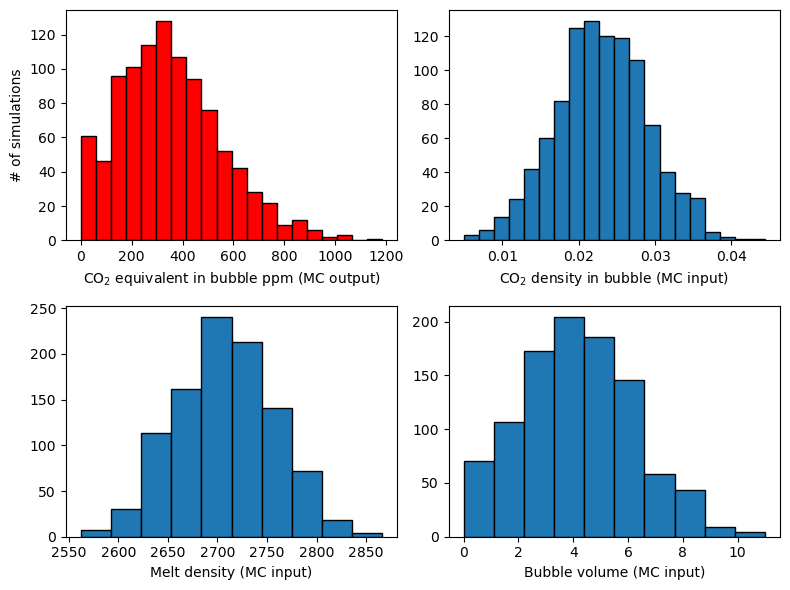

In [25]:
sam='LL8_615'
b=all_sims
fig, ((ax0, ax1), (ax2, ax3)) = plt.subplots(2, 2, figsize=(8,6))
ax0.hist(b['CO2_eq_melt_ppm_MC'].loc[b['Filename']==sam], bins=20,  fc='red', ec='k')
ax0.set_xlabel('CO$_2$ equivalent in bubble ppm (MC output)')

ax1.hist(b['CO2_bub_dens_gcm3_with_noise'].loc[b['Filename']==sam], bins=20, ec='k')
ax1.set_xlabel('CO$_2$ density in bubble (MC input)')

ax2.hist(b['melt_dens_kgm3_with_noise'].loc[b['Filename']==sam], ec='k')
ax2.set_xlabel('Melt density (MC input)')

ax3.hist(b['vol_perc_bub_with_noise'].loc[b['Filename']==sam], ec='k')
ax3.set_xlabel('Bubble volume (MC input)')

ax0.set_ylabel('# of simulations')
fig.tight_layout()